# 3. Plotting for Exploratory data analysis (EDA)

# (3.1) Basic Terminology

# Haberman Cancer Survival Dataset

The dataset contains data of the survival of patients who had undergone surgery for breast cancer.

It contains :-

305 datapoints/rows
4 fearures includeing class label



In [1]:
import warnings 
warnings.filterwarnings("ignore") 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#Load Iris.csv into a pandas dataFrame.
hbd = pd.read_csv("D://ML Assignments/haberman.csv")

print(hbd.head())

   30  64   1  1.1
0  30  62   3    1
1  30  65   0    1
2  31  59   2    1
3  31  65   4    1
4  33  58  10    1


In [2]:
# (Q) how many data-points and features?
print (hbd.shape)

(305, 4)


In [3]:
#(Q) What are the column names in our dataset?
print (hbd.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


Observation:
1. columns name are missing in the dataset.

In [4]:
#Adding column names in the data set.
hbd.columns = ["Age","Operation_Year","positive_lymph_nodes","Survival status"]
hbd.head()

,Age,Operation_Year,positive_lymph_nodes,Survival status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [5]:
#(Q) How many data points for each class are present? 

hbd["Survival status"].value_counts()
# balanced-dataset vs imbalanced datasets

1    224
2     81
Name: Survival status, dtype: int64

In [ ]:
Dataset is an imbalanced dataset as 224 samples from class 1 and 81 samples from class2

In [6]:
hbd.describe()

,Age,Operation_Year,positive_lymph_nodes,Survival status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Observation(s):
1. Patients are aged between 30-83 years with the median of 52 and Operated Years are in  between years 1958-1969.
2. Maximum number of positive lymph nodes is 52, But nearly 75% of the patients have 0-4 positive lymph nodes and 25% have no positive lymph nodes 

# Objective:
To explore the Haberman Cancer Survival Dataset 
and find which feature(s) are helpfull in determining the survival status of a person after 5 years of operation.

# Univariate Analysis:
Univariate analysis on the dataset will help us explore a single feature/Variable. 
Univariate analysis includes Histogram, CDF, PFD etc.

In [ ]:
Theory:
Distribution plots describes how the data points are distributed with respect to its frequency.
Histogram:Data points are grouped into bins and the height of the bars represents number of data points lying within that group.
PDF: Probabilty that the variable takes a value x. (smoothed version of the histogram)

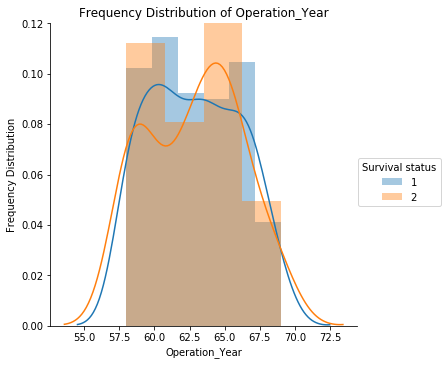

In [11]:
# Distribution of Operation Year
sns.FacetGrid(hbd, hue="Survival status", size=5)\
.map(sns.distplot, "Operation_Year").add_legend();
plt.ylabel('Frequency Distribution')
plt.title("Frequency Distribution of "+ "Operation_Year")
plt.show();

The survival status corresponding to operation year data points are overlapping, 
hence no conclusion can be made about the survival status based on the operation year.

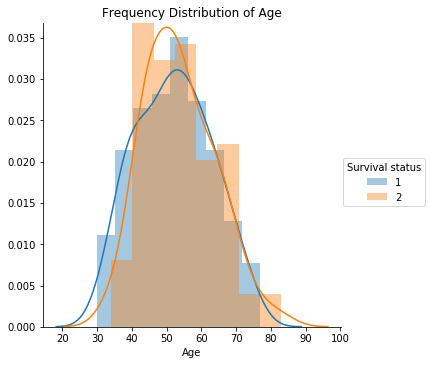

In [12]:
# Distribution for Age at the time of operation 
sns.FacetGrid(hbd, hue="Survival status", size=5)\
.map(sns.distplot, "Age").add_legend();
plt.title("Frequency Distribution of "+ "Age")
plt.show();

The data is overlapping hence no major conclusion can be made.
If age<40 then survival chances are more

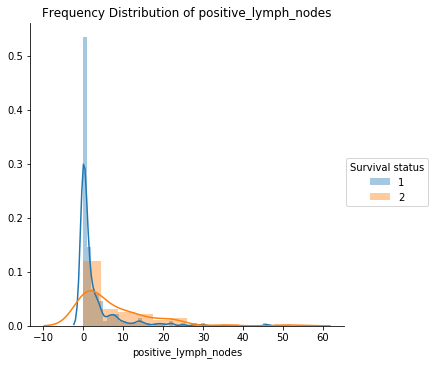

In [13]:

sns.FacetGrid(hbd, hue="Survival status", size=5) \
   .map(sns.distplot, "positive_lymph_nodes") \
   .add_legend();
plt.title("Frequency Distribution of "+ "positive_lymph_nodes")
plt.show();

The number of positive lymph nodes of the survivors is highly densed from 0 to 5. 
Patient with 0-3 positive_lymph_nodes had higher chances of survival.

From the Univariate analysis both Age and Operation_Year are not good features to make any conclusion as the distibution is more similar for both classes. 
positive_lymph_nodes is the only feature that is useful to some extent to know about the survival status of patients.

In [14]:
Survived=hbd.loc[hbd["Survival status"]==1]
Died=hbd.loc[hbd["Survival status"]==2]

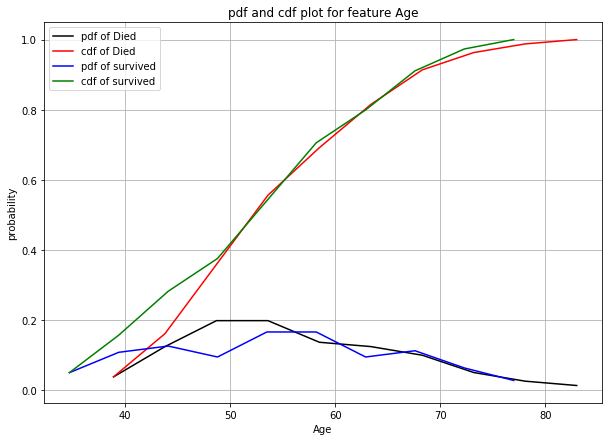

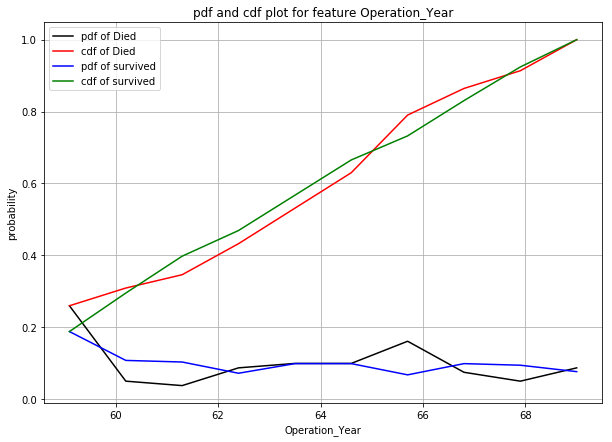

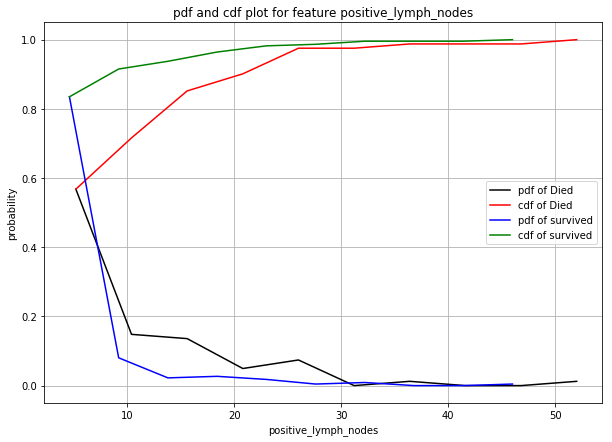

In [15]:
for feature in (list(hbd.columns)[:-1]):
    plt.figure(figsize=(10,7))
    counts, bin_edges = np.histogram(Died[feature], bins=10, 
                                 density = True)
    pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf,label="pdf of Died",color="Black");
    plt.plot(bin_edges[1:], cdf,label="cdf of Died",color="red")

    counts, bin_edges = np.histogram(Survived[feature], bins=10, density = True)
    pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
    cdf = np.cumsum(pdf)

    plt.plot(bin_edges[1:],pdf,label="pdf of survived",color="Blue");
    plt.plot(bin_edges[1:],cdf,label="cdf of survived",color="Green")
    plt.grid()
    plt.xlabel(feature)
    plt.ylabel('probability')
    plt.legend()
    plt.title("pdf and cdf plot for feature "+feature)
    plt.show();
    

In [16]:
print("Summary Statistics of Patients who are Survived for more than 5 years:")
Survived.describe()

Summary Statistics of Patients who are Survived for more than 5 years:


,Age,Operation_Year,positive_lymph_nodes,Survival status
count,224.000000,224.000000,224.000000,224.0
mean,52.116071,62.857143,2.799107,1.0
std,10.937446,3.229231,5.882237,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [17]:
print("Summary Statistics of Patients who are Died befor less than 5 years:")
Died.describe()

Summary Statistics of Patients who are Died befor less than 5 years:


,Age,Operation_Year,positive_lymph_nodes,Survival status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


In [18]:
print (np.percentile(Survived["Age"],np.arange(0,100,25)))
print (np.percentile(Survived["Age"],90))
print (np.percentile(Died["Age"],np.arange(0,100,25)))
print (np.percentile(Died["Age"],90))

[ 30.  43.  52.  60.]
67.0
[ 34.  46.  53.  61.]
67.0


In [19]:
print (np.percentile(Survived["positive_lymph_nodes"],np.arange(0,100,25)))
print (np.percentile(Survived["positive_lymph_nodes"],90))
print (np.percentile(Died["positive_lymph_nodes"],np.arange(0,100,25)))
print (np.percentile(Died["positive_lymph_nodes"],90))

[ 0.  0.  0.  3.]
8.0
[  0.   1.   4.  11.]
20.0


From above pdf, cdf plots and description stats:
    1. We can not make any conclusion from features Operation_Year and Age as plots are overlapping
    and stats are also similar for Survived and Died classes.
    2. Feature positive_lymph_nodes can be used to make few conclusions like 
        a. 75% patients with 3 of less positive_lymph_nodes nodes are survived 
        b. 75% patients died with 11 or more positive_lymph_nodes are died

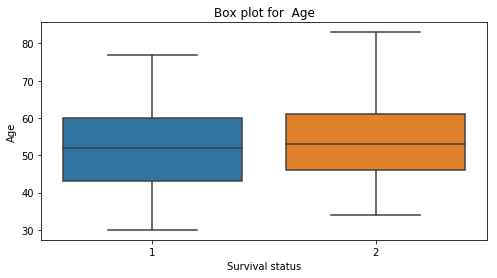

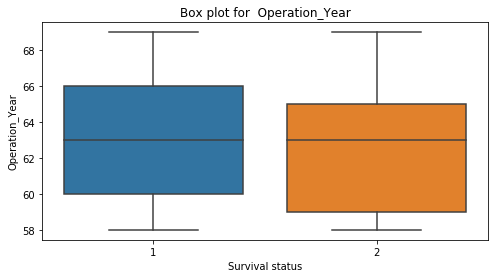

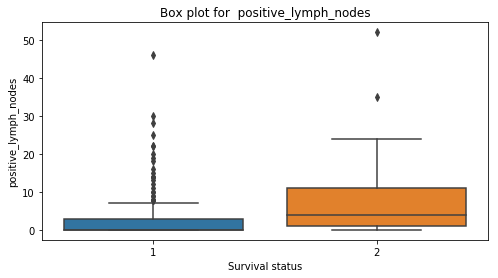

In [20]:
for feature in (list(hbd.columns)[:-1]):
    plt.figure(figsize=(8,4))
    plt.title("Box plot for  "+feature)
    sns.boxplot(x='Survival status',y=feature, data=hbd)
    plt.show()

# Violin plots

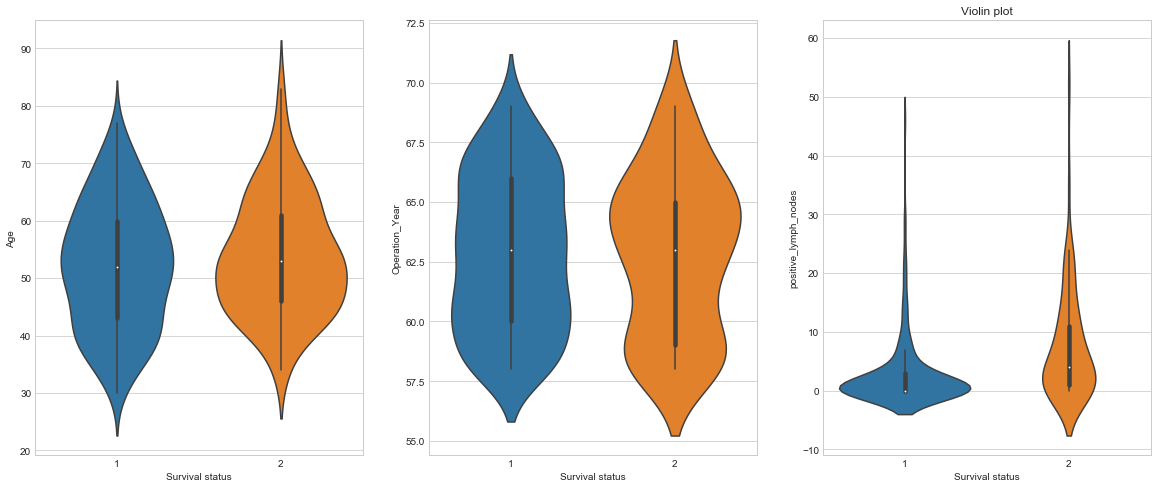

In [34]:
#Violin plot is the combination of box plot and probability density function.
#Denser regions of the data are fatter, and sparser ones thinner in a violin plot.

fig, axes = plt.subplots(1, 3, figsize=(20, 8))
plt.title("Violin plot")
for idx, feature in enumerate(list(hbd.columns)[:-1]):
    sns.violinplot( x='Survival status', y=feature, data=hbd, ax=axes[idx])

plt.show()

Observation:
1. The number of positive lymph nodes of the survivors is highly densed from 0 to 5.
2. From box plots distribution of patients over features Age and Operation_Year is overlapping for both classes.
3. From violin plots, more no of patients who died had age between 46-52,year between 53-65 and 
    the patients who survived have age between 50-60, year between 58-62.

# BI-VARIATE ANALYSIS

# (3.2) 2-D Scatter Plot

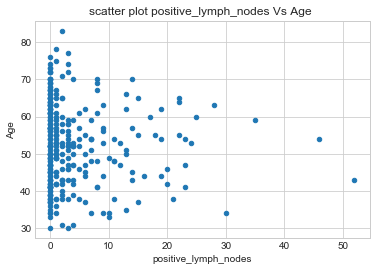

In [32]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

hbd.plot(kind='scatter', x='positive_lymph_nodes', y='Age') ;
plt.title("scatter plot positive_lymph_nodes Vs Age ")
plt.show()

In [ ]:
#For all Age values, positive_lymph_nodes values are concentrated in range 0-5

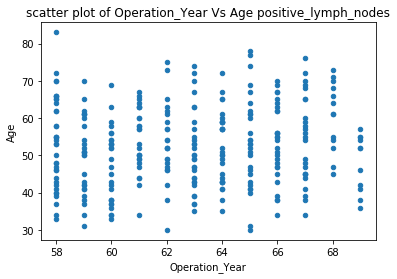

In [28]:
hbd.plot(kind='scatter', x='Operation_Year', y='Age') ;
plt.title("scatter plot of Operation_Year Vs Age "+feature)

plt.show()

In [ ]:
# No significant conclusion can be drawn from plot

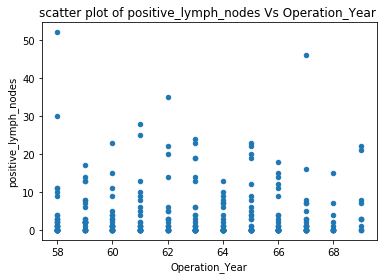

In [29]:
hbd.plot(kind='scatter', x='Operation_Year', y='positive_lymph_nodes') ;
plt.title("scatter plot of positive_lymph_nodes Vs Operation_Year ")
plt.show()

In [ ]:
# No significant conclusion can be drawn from plot

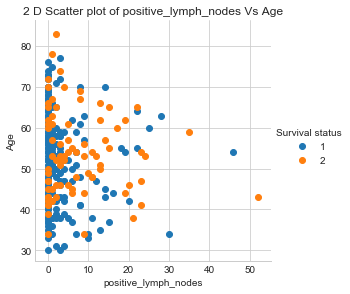

In [30]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(hbd, hue="Survival status", size=4) \
   .map(plt.scatter, "positive_lymph_nodes", "Age") \
   .add_legend();
plt.title("2 D Scatter plot of positive_lymph_nodes Vs Age")

plt.show();



In [ ]:
# No significant conclusion can be drawn from plot as it is overlapping

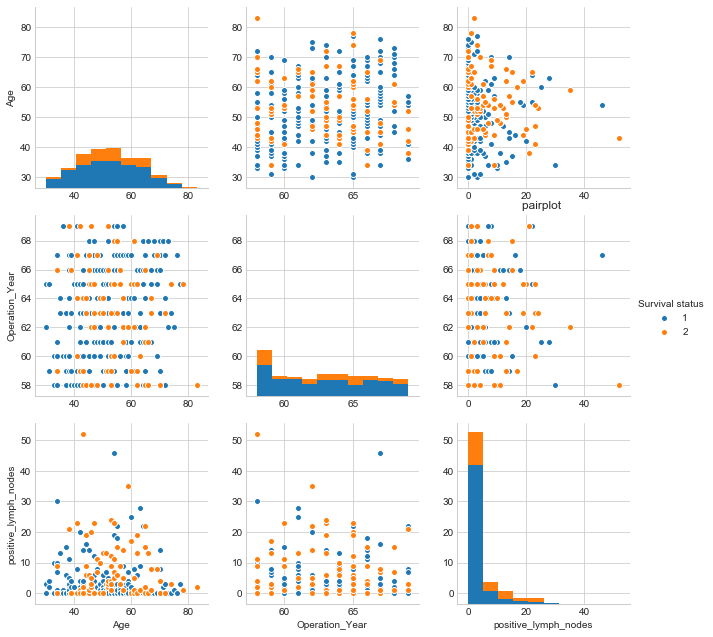

In [31]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hbd, hue="Survival status",
             vars=['Age','Operation_Year','positive_lymph_nodes'], size=3)
plt.title("pairplot ")

plt.show()
# The diagnol elements are PDFs for each feature.

Observation(s):
Most of plots are overlapping. 
We can not find "lines" and "if-else" conditions to build a simple model to classify the survival status of the patient.